# Introducción a la Ciencia de los Datos, CIDE
### (Profesor Gonzalo Castañeda)
# P14. Modelos de ensambles con Python
### Müller Andreas C. & Sarah Guido. 2016. Introdution to Machine Learning with Python, O’Reilly Media
Chap. 2. Supervised Learning, Section Ensambles of Decision Trees.

## (1)  Random Forests

In [21]:
# Existen un conjunto de modelos de ML que se construyen a partir de árboles de decisión 
# con el propósito de reducir problemas de overfitting (elevada varianza). Entre los más comúnes
# se encuentran: Random forests y Gradient boosting.
# Estos dos métodos son muy poderosos en términos de la exactitud de sus pronósticos

In [22]:
# Si bien los árboles de decisión hacen un buen trabajo, tienden a crear overfitting 
# en parte de los datos de entrenamiento, por lo que la idea es combinar a varios
# árboles y, de esta manera, reducir el overfitting promedio

In [23]:
# Como el nombre de Random Forest lo indica, creamos aleatoridad al construir varios
# árboles de tal manera que cada uno de ellos es diferente.
# Existen dos formas de crear aleatoriedad en un ensamble : (i) seleccionando las instancias 
# que integran al conjunto de entrenamiento y (ii) seleccionando al azar los atributos en que
# se dividen los ramales del árbol. 

In [24]:
# la aleatoriedad genera independencia en los pronósticos particulares de cada árbol, 
# lo que hace más exacto al pronóstico del voto mayoritario.
# Para crear las muestras independientes, se aplica el método de Bootstrap, en el que se toman
# muestras aleatorias con remplazo de las instancias del conjunto de entrenamientos

In [25]:
# En una segunda etapa de la construcción del ensamblado de árboles se selecciónan un cierto número 
# de atributos al azar en cada nodo del árbol. 
# Este procedimiento substituye a la formación de sub-espacios en cada nodo a partir  
# de las mejores divisiones del conjunto completo de atributos.

In [26]:
# Por lo tanto dos hiper-parámetros importantes son: n_estimators = que define el número de
# árboles que componen el ensamble; max_features = que establece el número máximo de atributos
# que pueden ser elegidos al azar en cada ramal

In [27]:
# Un elevado max_features implica que los árboles en el Random forest van  a ser similares
# Un bajo max_feature tiende a generar árboles diferentes, y que cada árbol va a tener que ser 
# profundo para que el modelo pueda realizar un buen trabajo de ajuste a los datos

In [28]:
# En los ejemplos que se presentan a continuación se usa el voto mayoritario suave, por lo que
# en cada árbol se hace referencia a probabilidades de las distintas clases 
# y no a valores puntuales. Las probabilidades de cada árbol se promedian y la clase con la
# mayor probabilidad es elegida.

### (2) Un ejemplo de Random Forest

In [29]:
# Usamos una base incluida en sklearn: make_moons e importamos el clasificador correspondiente
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [30]:
# Establecemos la base de datos a partir de un conjunto más amplio de información y
# Dividimos a los datos en conjunto de prueba y conjunto de aprendizaje
X, y = make_moons(n_samples=100, noise=0.25,  random_state=3)   # Tomamos 100 instancias
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

In [31]:
# Creamos el Random forest mediante los dos procesos de aleatorización
forest = RandomForestClassifier(n_estimators=5, random_state=2)  # Se construyen cinco árboles 
forest.fit(X_train, y_train)
# Calculamos la exactitud en el aprendizaje y en la prueba
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.920


In [32]:
# Las fronteras de decisión de cada árbol son muy diferentes (podemos observar estas fronteras 
# si solo se consideran dos atributos en los sub-espacios).
# Las fronteras del random forest producen un menor overfitting
# Entre más árboles se usan más suaves son las fronteras

### Árboles de decisión aleatorizados y sus fronteras versus pronosticos promedios con Random Forest 
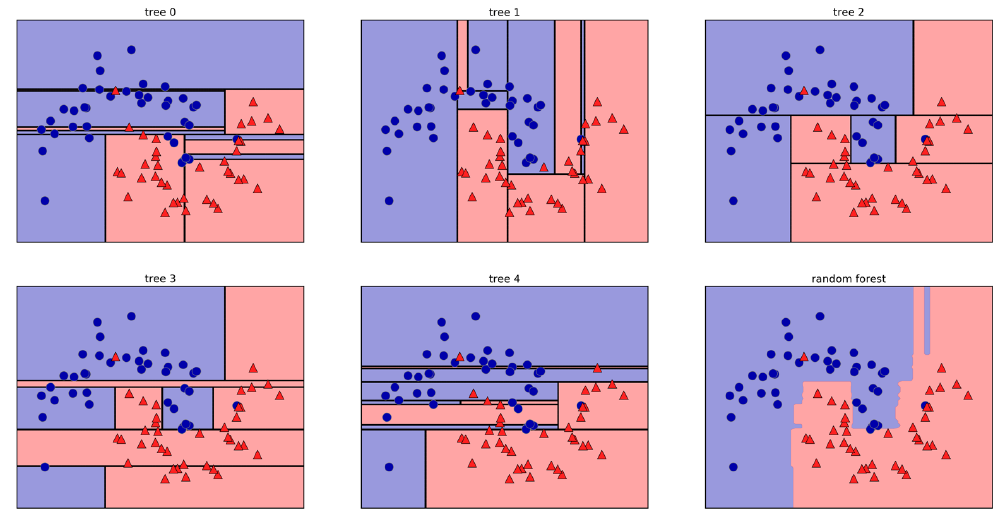


## (3) La importancia de los atributos

In [33]:
# Construimos ahora 100 árboles independientes con la base de cáncer de pecho
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
# El ajuste en el testing set con Random Forest es mejor que cuando se ajusta un solo árbol

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [34]:
# Se podrían podar los árboles, o bien cambiar el número de atributos en los ramales
# con max_features.  Sin embargo los valores establecidos por sklearn por default
# arrojan muy buenos resultados

In [35]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]               # Número de atributos disponibles en la base
  plt.barh(range(n_features), model.feature_importances_, align='center')   # diagrama de barra
  plt.yticks(np.arange(n_features), cancer.feature_names)     # Etiquetas
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

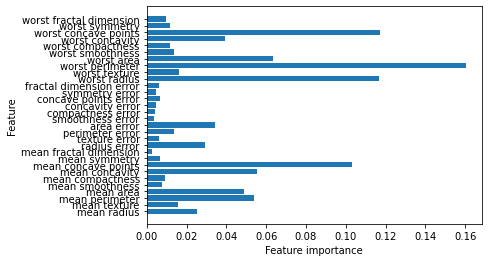

In [36]:
plot_feature_importances_cancer(forest)
# Se puede observar que Random forest no presenta tantos atributos con importancia cero
# como es el caso en los árboles individuales
# También le da mucha importancia a 'worst radius', pero la barra más elevada es ahora 
# 'worst perimeter'
# El algoritmo permite capturar mejor la esencia de los atributos que están detrás de las 
# predicciones

## (4)Fortalezas y debilidades

In [37]:
# (i) Son algoritmos muy populares en ML debido a su fuerte capacidad predictiva
# (ii) No necesitan escalamiento de los atributos
# (iii) No son dependientes del calibramiento de los hiper-parámetros (max_depth, etc)
# (iv) A diferencia de los árboles individuales no se prestan a interpretaciones
# (v) Si la base de datos es muy grande, pueden requerir mucho tiempo de cómputo
# En cuyo caso, con n_jobs = -1 se pueden usar de forma paralela todo los CPU cores de la computadora
# Entre más árboles se construyen, los resultados van a ser más robustos a la selección del 
# random_state
# (vi) No suelen tener muy buen desempeño con bases de datos de alta dimensionalidad y esparcidos, 
# como es el caso de datos de texto

## (5) Gradient boosting  (potencialización a partir de gradientes)

In [38]:
# En este modelo, los árboles sen van construyendo de manera secuencial (i.e. conjunto de arbustos)
# De tal manera que cada árbol (arbusto) trata de corregir los errores anteriores
# Estos árbustos suelen ser pequeños (1-5 de profundidad), lo que reduce de manera considerable
# el tiempo máquina para hacer predicciones

In [39]:
# la idea es combinar aprendizajes débiles (i.e. árboles pequeños) que solo pueden capturar 
# algunos patrones en parte de los datos, pero que pueden potencializar su capacidad predictiva 
# al realizar ensambles

In [40]:
# Aunque en conparación con Random Forest requiren calibración de hiper-parámetros, el buen ajuste de
# estos valores permite lograr mejoras en la exactitud de las predicciones

In [41]:
# A través de un nuevo parámetro learning_rate se pondera la importancia que se le da a los 
# árboles adicionales 

In [42]:
# veamos un ejemplo con la base de cáncer de pecho
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [43]:
# Para reducir las posibilidades de overfitting podemos podar, y reducir la profundidad del árbol,
# o bien reducir la tasa de aprendizaje

In [44]:
# Mediante max_depth = 1
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
# Se reduce la exactitud en training set, pero se aumenta en testing set

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [45]:
# Mediante learning_rate = 0.01
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
# En este caso la reducción en la profundidad de los árboles resulta más adecuada

Accuracy on training set: 0.988
Accuracy on test set: 0.965


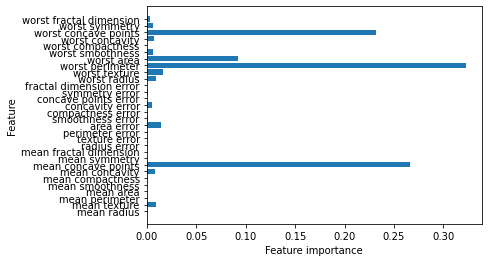

In [46]:
# veamos ahora la importancia de los atributos
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)
# Notar que también resalta la importancia de ciertos atributos, pero no son los mismos que en RF
# además, ahora muchos más carecen de relevancia